In [1]:
# Import the all the usefull libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data which we are wroking on 

salary_data = pd.read_csv("Salary_dataset.csv")
salary_data.info()
salary_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


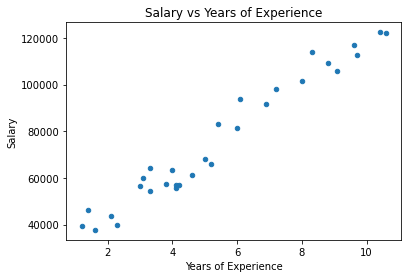

In [3]:
# Now lets plot the data using the matplotlib

salary_data.plot(kind = "scatter", x = "YearsExperience",y = "Salary" )
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [4]:
salary_data["Salary"].value_counts()
salary_data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
# Take out the X and Y data set

X = salary_data['YearsExperience']
y = salary_data['Salary']

len(X)

30

In [6]:
print("The data type of X : ", X.dtype)
print("The data type of y : ", y.dtype)

The data type of X :  float64
The data type of y :  float64


In [23]:
def linear_regression(X,y):
    
    # Convert it into numpy array 
    X = np.array(X)
    y = np.array(y)
    
    
    # 1 : Calulate means
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # 2 : Take out the slope 
    numerator = np.sum((X - X_mean) * (y- y_mean))
    denominator = np.sum((X-X_mean) ** 2)
    
    M = numerator / denominator
    
     # Step 3: Calculate intercept (B)
    B = y_mean - M * X_mean
    
    return M, B

In [25]:
M, B = linear_regression(X, y)

print("Slope (M):", M)
print("Intercept (B):", B)
print(f"Final Equation: y = {M}x + {B}")

Slope (M): 9449.962321455076
Intercept (B): 24848.2039665232
Final Equation: y = 9449.962321455076x + 24848.2039665232


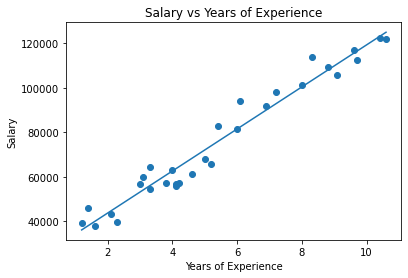

In [27]:
plt.scatter(X, y)
plt.plot(X, M * X + B) # y=MX+B

plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

In [61]:
y_pred = 9449.962321455076 * 11 + 24848.2039665232
y_pred

128797.78950252903

## Mean Squared Error (MSE)
  * MSE=n1​∑(yi​−y^​i​)2

In [32]:
# 1 : Predict all the values 
y_pred = M * X + B

# 2 : Calulate MSE
mse = np.mean((y - y_pred) ** 2)

print("Mean square Error : ", mse)

Mean square Error :  31270951.72228094


## Root Mean Squared Error
    * RMSE=wholeroot(MSE)

In [35]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5592.0436087606595


## R² Score
    * R2=1−SSresidual / SStotal

In [38]:
ss_res = np.sum((y - y_pred) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)

r2 = 1 - (ss_res / ss_total)

print("R2 Score:", r2)

R2 Score: 0.9569566641435086


# Now lets compare our model with Sklearn model 


In [41]:
# 1 : Import the LinearRegression 

from sklearn.linear_model import LinearRegression

In [43]:
# 2 : IMPORTANT — Make X 2D

X_sklearn = salary_data[['YearsExperience']]  
y_sklearn = salary_data['Salary']

In [49]:
# 3 : Create a model 

model = LinearRegression()

# Fit the data on the model 
model.fit(X_sklearn, y_sklearn)

LinearRegression()

In [51]:
# 4: Get Slope and Intercept

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 9449.962321455074
Intercept: 24848.203966523208


In [53]:
# 5: Check R² Score

print("R2 Score:", model.score(X_sklearn, y_sklearn))

R2 Score: 0.9569566641435086


In [54]:
print("Predicted Salary:", model.predict([[11]]))

Predicted Salary: [128797.78950253]


C:\Users\Mamtaam\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


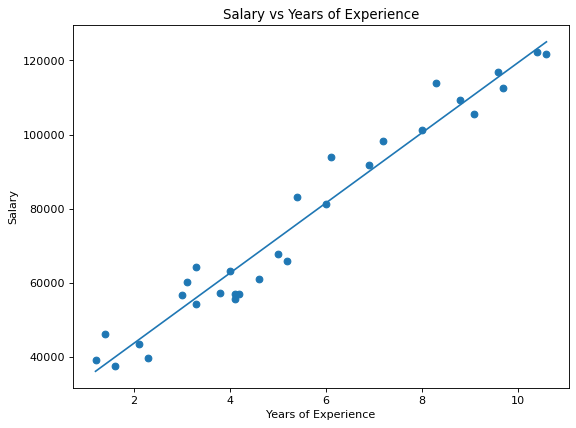

In [67]:
# Get Predictions
y_pre = model.predict(X_sklearn)

# Convert X to 1D
X_values = X_sklearn.values.flatten()

# Plot
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X_values, y_sklearn)
plt.plot(X_values, y_pre)

plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()